In [18]:
import matplotlib.pyplot as plt
import glob

from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

In [19]:
import dataloader
import textprocessor

In [20]:
stopwords = dataloader.load_stopwords("data/stopwords")
len(stopwords)

560

In [21]:
documents = dataloader.load_data("data/posts/*")
documents

['The Cafe Journal — The Cafe With No Name21 July, 2017, FridayCourtesy of nishparadox — The Boy With No Name :PPreludeAs usual, we guys — me,\nBijay and Mahendra thought of spending some time after office — to chill, to have caffeine, talk about work, life, love and shit.This time,\nthe purpose was not coffee. So we headed to Thamel.** coughs **The guys had t-shirts to buy from a shop in Thamel. Trust me, the price for\neach t-shirt is cheap in that shop. However I didn’t buy because I had bought one few days back along with a new bag.InterludeAfter buying\nt-shirt, Bijay had a name of the cafe where we could go for chilling, for solitude —The Cafe With No Name.He had read about the cafe in a\nblog. We did laugh on hearing upon the name. I had the Game of Thrones reference in my mind.So, we headed out. Suddenly in the middle of\nchaos of Thamel, we were having trouble in locating the cafe just as the saying goes:“so near, yet so far”.Wrong alley, hopes lost, nights\nrising. How worse 

In [22]:
documents = textprocessor.process_documents(documents)
documents

['the cafe journal the cafe with no name <number> july <number> fridaycourtesy of nishparadox the boy with no name ppreludeas usual we guys me bijay and mahendra thought of spending some time after office to chill to have caffeine talk about work life love and shit this time the purpose was not coffee so we headed to thamel coughs the guys had t shirts to buy from a shop in thamel trust me the price for each t shirt is cheap in that shop however i did not buy because i had bought one few days back along with a new bag interludeafter buying t shirt bijay had a name of the cafe where we could go for chilling for solitude the cafe with no name he had read about the cafe in a blog we did laugh on hearing upon the name i had the game of thrones reference in my mind so we headed out suddenly in the middle of chaos of thamel we were having trouble in locating the cafe just as the saying goes so near yet so far wrong alley hopes lost nights rising how worse can it get postludethe cafe is locat

In [26]:
filenames = glob.glob('data/posts/*')
n = len('data/posts/20XX-XX-XXTXX:XX:XX.XXXZ-')
filenames = [ fname[n:] for fname in filenames ]
print(len(filenames))
filenames

53


['The-Cafe-Journal-—-The-Cafe-With-No-Name',
 'Change',
 'The-Cafe-Journal-—-The-Sky-Cafe',
 'Solitude',
 'High-Volt',
 'New-Year-X-BS',
 'Responsibility',
 'पीपलको-बोट',
 'The-Cockroach-Effect',
 'When-Walking-Becomes-More-Than-Just-A-Habit',
 'When-Nature-Calls...',
 'Bits-and-Paradoxes-—-The-mask',
 'Life-and-Paradox',
 'Why-I-want-to-volunteer,-now-and-then;-often',
 'Plus-1',
 'Emptiness',
 'The-Cafe-Journal-—-Japanese-Kitchen-Kizuna',
 'Tetris-Effect-:-Beats,-Rhythms-and-Music',
 'A-child-inside-a-maturing-soul',
 'Vulnerability-and-Life',
 'On-Codes-and-Cleanliness',
 'The-Sound-of-Life',
 'Virtual-Reality-—-Let’s-Get-Into-The-Matrix',
 'Distances',
 'Bits-and-Paradoxes---II',
 'A-Programmer’s-Dilemma',
 'I-am-the-pit',
 'In-The-core',
 'Paradox-of-My-Life',
 'Niva:-A-Ray-of-Hope',
 'Haunted-Streets',
 'Ephemerality',
 'Stripping-the-Hackathon-2015',
 'Bits-and-Paradoxes---I',
 'One-of-the-most-important-lessons-of-my-life-so-far',
 'मानिसको-भिड,-म-अनि-मेरा-बिलिन-हुन-लागेका-बिचा

In [24]:
# tokenize
tokens = [document.split() for document in documents]
tokens = [ textprocessor.lemmatize(token_list) for token_list in tokens ]

# tokenize -> preprocess
print(list(map(lambda x : len(x), tokens)))

[607, 564, 489, 278, 311, 255, 560, 2, 799, 1074, 414, 1145, 641, 918, 776, 988, 809, 1201, 404, 616, 549, 1058, 1457, 695, 529, 700, 38, 151, 486, 258, 173, 535, 463, 530, 437, 6, 399, 929, 1698, 612, 87, 351, 168, 304, 807, 497, 549, 311, 183, 1269, 708, 636, 305]


In [9]:
tokens

[['the',
  'cafe',
  'journal',
  'the',
  'cafe',
  'with',
  'no',
  'name',
  '<number>',
  'july',
  '<number>',
  'fridaycourtesy',
  'of',
  'nishparadox',
  'the',
  'boy',
  'with',
  'no',
  'name',
  'ppreludeas',
  'usual',
  'we',
  'guy',
  'me',
  'bijay',
  'and',
  'mahendra',
  'think',
  'of',
  'spend',
  'some',
  'time',
  'after',
  'office',
  'to',
  'chill',
  'to',
  'have',
  'caffeine',
  'talk',
  'about',
  'work',
  'life',
  'love',
  'and',
  'shit',
  'this',
  'time',
  'the',
  'purpose',
  'be',
  'not',
  'coffee',
  'so',
  'we',
  'head',
  'to',
  'thamel',
  'cough',
  'the',
  'guy',
  'have',
  't',
  'shirt',
  'to',
  'buy',
  'from',
  'a',
  'shop',
  'in',
  'thamel',
  'trust',
  'me',
  'the',
  'price',
  'for',
  'each',
  't',
  'shirt',
  'be',
  'cheap',
  'in',
  'that',
  'shop',
  'however',
  'i',
  'do',
  'not',
  'buy',
  'because',
  'i',
  'have',
  'buy',
  'one',
  'few',
  'day',
  'back',
  'along',
  'with',
  'a',
 

In [8]:
data = [' '.join(token_list) for token_list in tokens ]

In [9]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data)
X.shape

/home/paradox/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  sorted(inconsistent))


(52, 3584)

## PCA

In [10]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

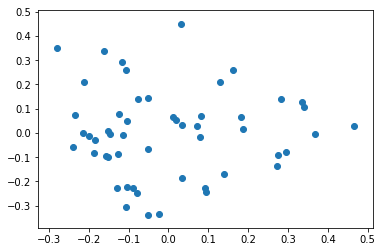

In [11]:
%matplotlib inline
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [14]:
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X.toarray())

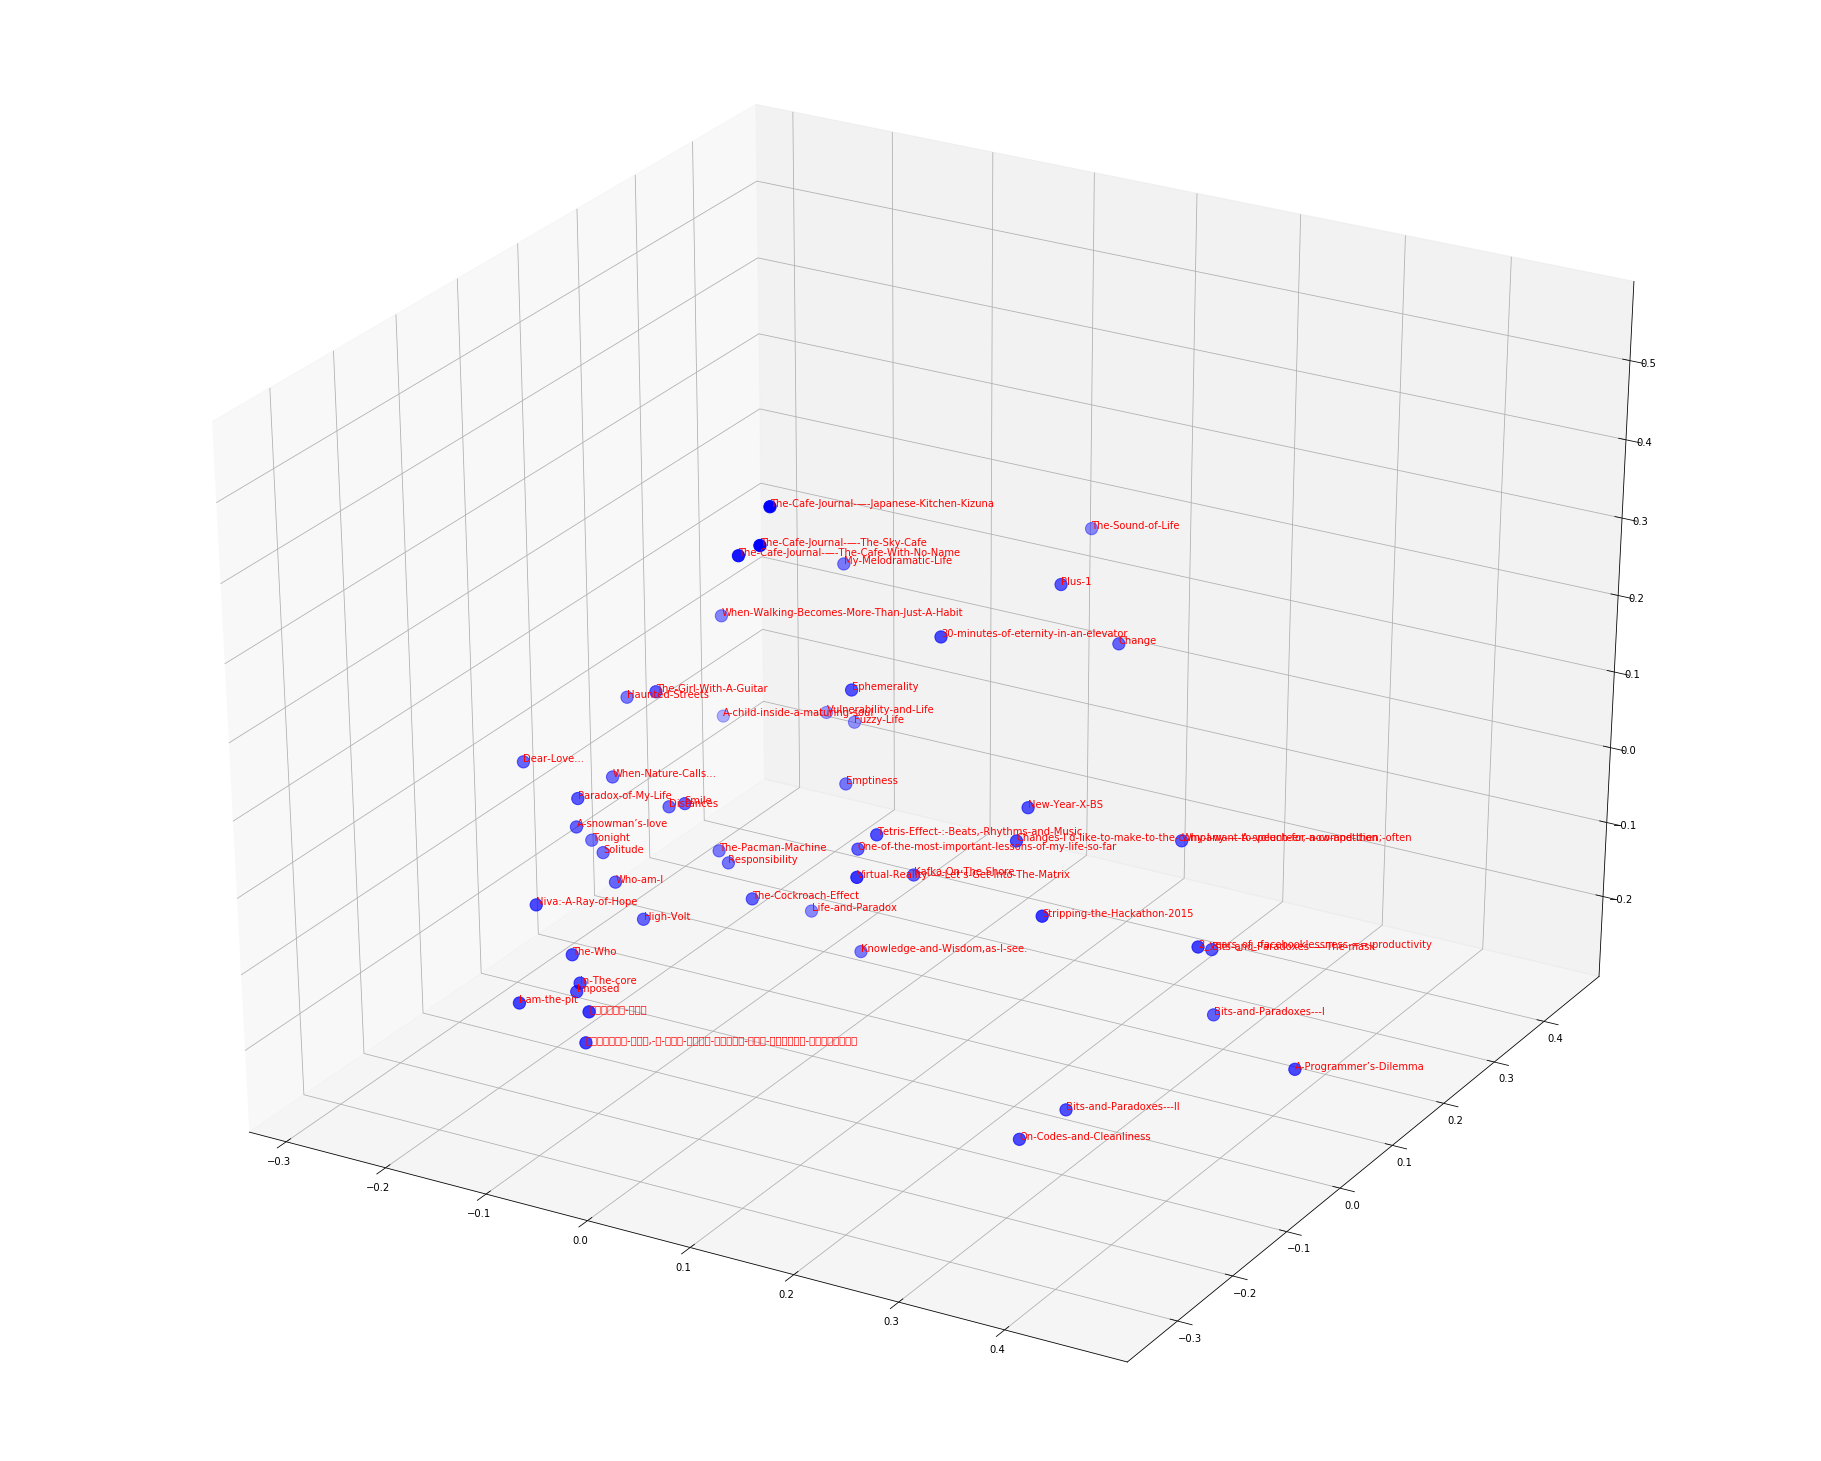

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 20
# visualize in 3d space
Xp = X_3d[:, 0]
Yp = X_3d[:, 1]
Zp = X_3d[:, 2]

# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(Xp, Yp, Zp, c='blue', s=150)

for i, txt in enumerate(filenames):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

## t-SNE

In [14]:
tsne_2d = TSNE(n_components=2)
X_2d = tsne_2d.fit_transform(X.toarray())

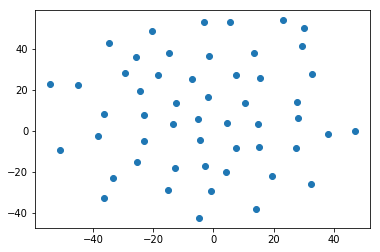

In [15]:
%matplotlib inline
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [16]:
tsne_3d = TSNE(n_components=3)
X_3d = tsne_3d.fit_transform(X.toarray())

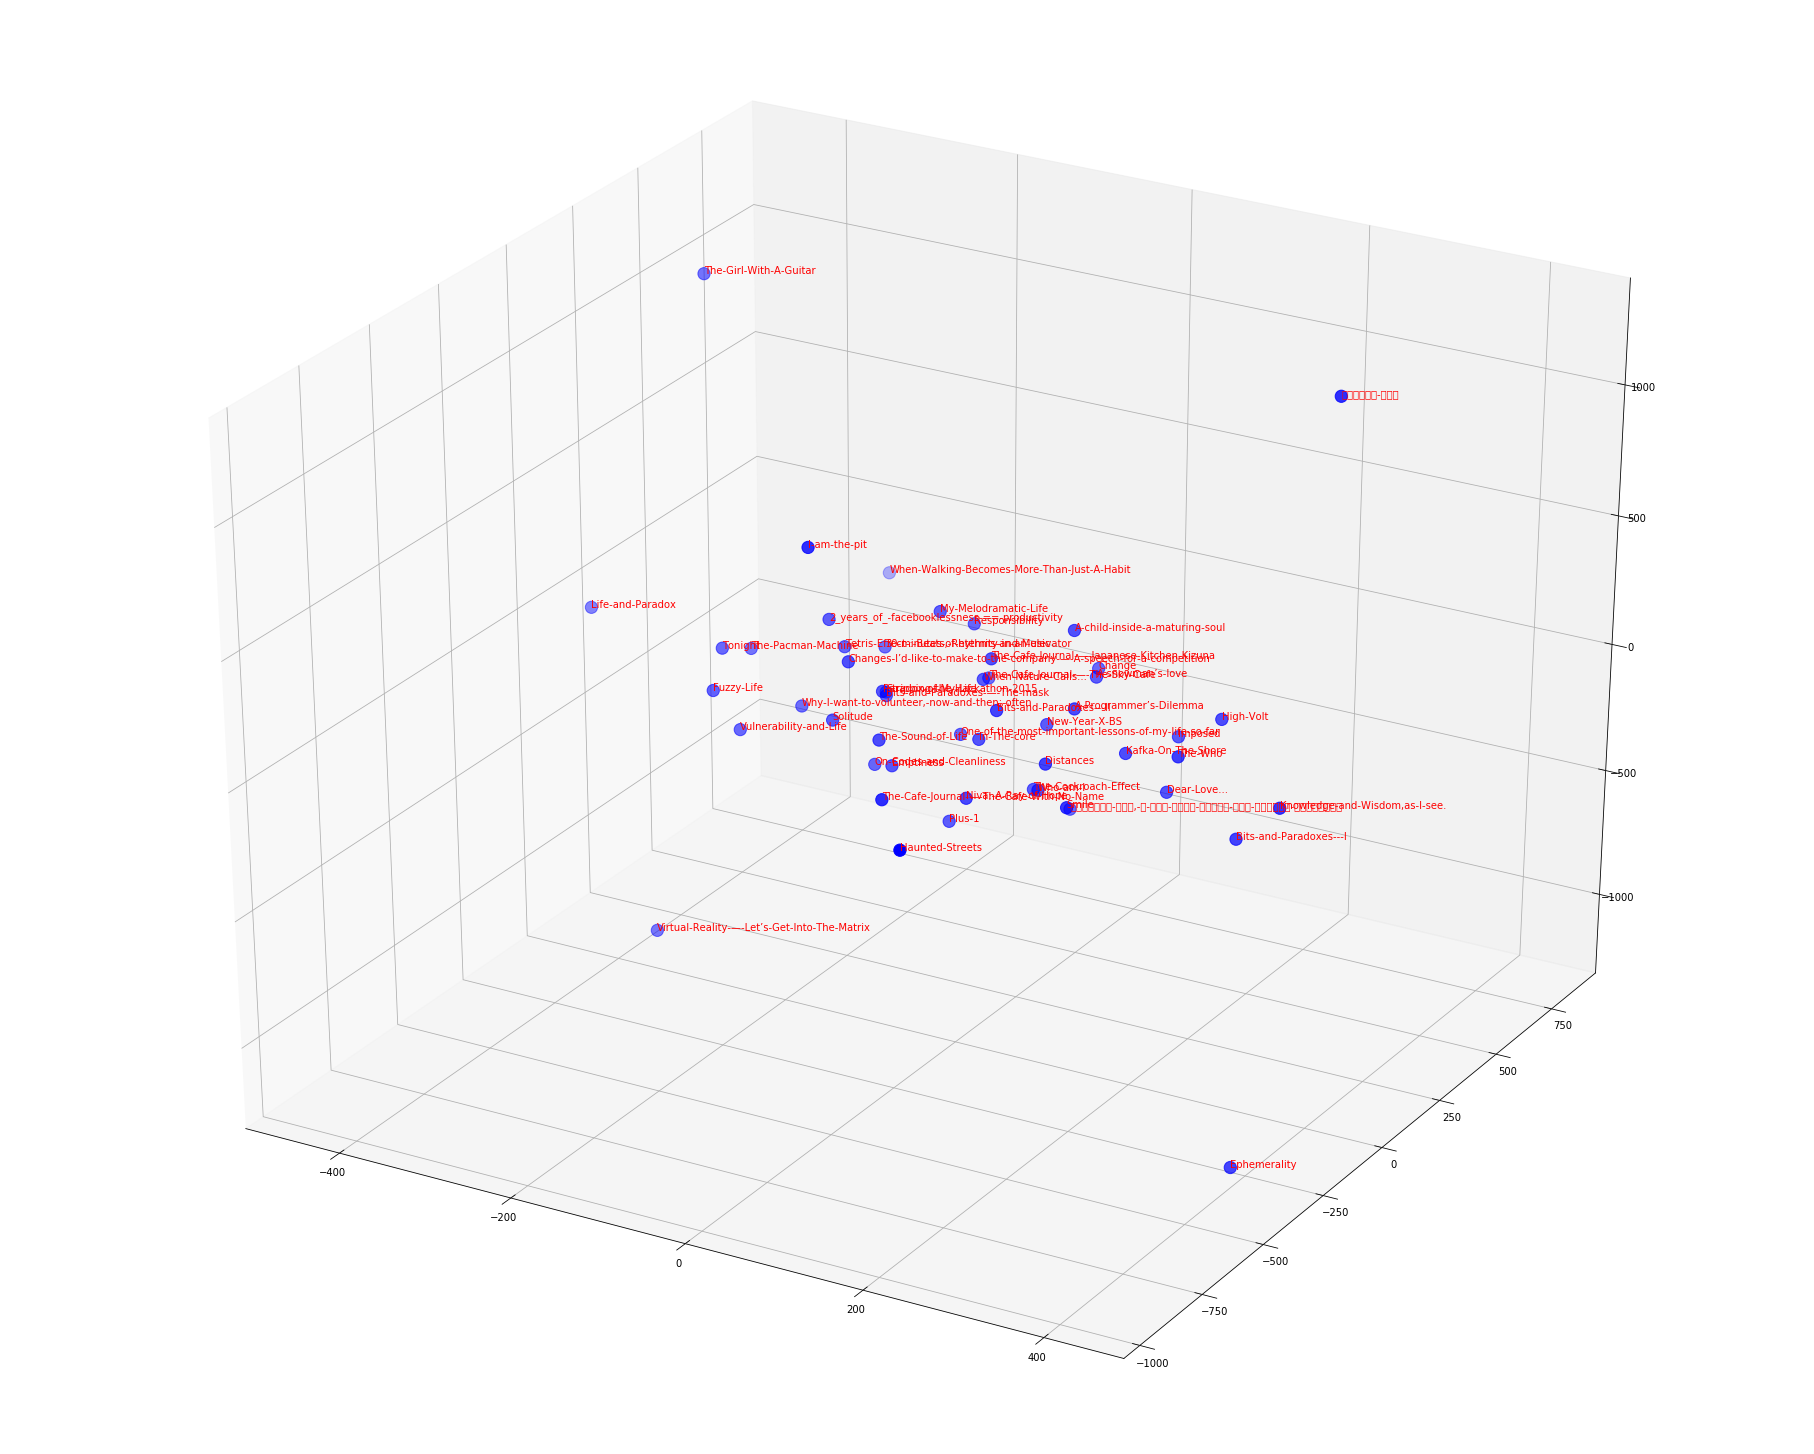

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 20
# visualize in 3d space
Xp = X_3d[:, 0]
Yp = X_3d[:, 1]
Zp = X_3d[:, 2]

# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(Xp, Yp, Zp, c='blue', s=150)

for i, txt in enumerate(filenames):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()